In [1]:
import numpy as np


class Network:
    def __init__(self, xmin, xmax, ymin, ymax):
        """
        xmin: 150,
        xmax: 450, 
        ymin: 100, 
        ymax: 600
        """
        
        self.StaticDiscipline = {
            'xmin': xmin, 
            'xmax': xmax, 
            'ymin': ymin, 
            'ymax': ymax
        }

    def network(self, xsource, ysource = 100, Ynew = 600, divisor = 50): #ysource will always be 100
        """
        For Network A
        ysource: will always be 100
        xsource: will always be between xmin and xmax (static discipline)
        
        For Network B
        ysource: will always be 600
        xsource: will always be between xmin and xmax (static discipline)
        """
        
        while True:
            ListOfXsourceYSource = []
            Xnew = np.random.choice([i for i in range(self.StaticDiscipline['xmin'], self.StaticDiscipline['xmax'])], 1)
            #Ynew = np.random.choice([i for i in range(self.StaticDiscipline['ymin'], self.StaticDiscipline['ymax'])], 1)

            source = (xsource, ysource)
            target = (Xnew[0], Ynew)

            #Slope and intercept
            slope = (ysource - Ynew)/(xsource - Xnew[0])
            intercept = ysource - (slope*xsource)
            if (slope != np.inf) and (intercept != np.inf):
                break
            else:
                continue
                
        #print(source, target)
        # randomly select 50 new values along the slope between xsource and xnew (monotonically decreasing/increasing)
        XNewList = [xsource]

        if xsource < Xnew:
            differences = Xnew[0] - xsource
            increment = differences /divisor
            newXval = xsource
            for i in range(divisor):

                newXval += increment
                XNewList.append(int(newXval))
        else:
            differences = xsource - Xnew[0]
            decrement = differences /divisor
            newXval = xsource
            for i in range(divisor):

                newXval -= decrement
                XNewList.append(int(newXval))
                

        #determine the values of y, from the new values of x, using y= mx + c
        yNewList = []
        for i in XNewList:
            findy = (slope * i) + intercept#y = mx + c
            yNewList.append(int(findy))

        ListOfXsourceYSource = [(x, y) for x, y in zip(XNewList, yNewList)]

        return XNewList, yNewList
    

    
   

In [17]:
# Testing
net = Network(150,450,100,600)
NetworkA = net.network(300, ysource = 100, Ynew = 600) #Network A
NetworkB = net.network(200, ysource = 600, Ynew = 100) #Network B
#NetworkA

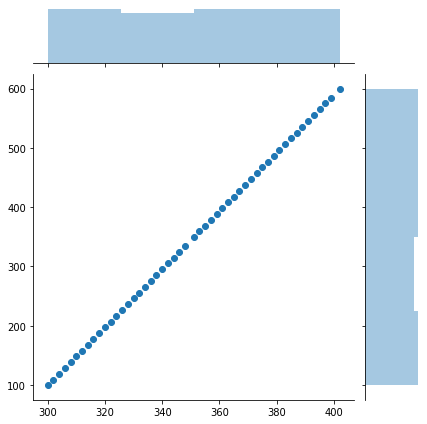

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(NetworkA[0], NetworkA[1])
plt.show()

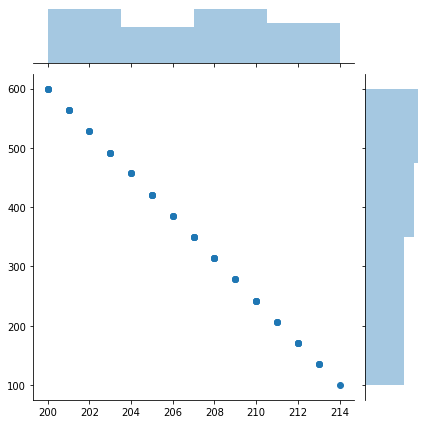

In [19]:
sns.jointplot(NetworkB[0], NetworkB[1])

In [13]:
#NetworkB

In [14]:
DefaultPositionA = 300
DefaultPositionB = 300

def DefaultToPosition(x1, x2 = 300, divisor = 50):
    XNewList = []
    if x1 < x2:
        differences = x2 - x1
        increment = differences /divisor
        newXval = x1
        for i in range(divisor):
            newXval += increment
            XNewList.append(int(np.floor(newXval)))
            
    else:
        differences = x1 - x2
        decrement = differences /divisor
        newXval = x1
        for i in range(divisor):
            newXval -= decrement
            XNewList.append(int(np.floor(newXval)))
    return XNewList
            
            
out = DefaultToPosition(250)
print(out)

[251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300]


In [15]:
j, x, y = next(zip(out, NetworkA[0], NetworkA[1]))
print(j, x, y)

251 400 100


In [16]:
import pygame, sys
from pygame.locals import *
pygame.init()
import time

FPS = 50
fpsClock = pygame.time.Clock()

# set up the window
DISPLAYSURF = pygame.display.set_mode((600, 700), 0, 32)
pygame.display.set_caption('REINFORCEMENT LEARNING (Discrete Mathematics) - TABLE TENNIS')
# set up the colors
BLACK = ( 0,0,0)
WHITE = (255, 255, 255)
RED= (255,0,0)
GREEN = ( 0, 255,0)
BLUE = ( 0,0, 255)

# draw on the surface object
def display():
    DISPLAYSURF.fill(WHITE)
    pygame.draw.rect(DISPLAYSURF, GREEN, (150, 100, 300, 500))
    pygame.draw.rect(DISPLAYSURF, RED, (150, 340, 300, 20))
    pygame.draw.rect(DISPLAYSURF, BLACK, (0, 20, 600, 20))
    pygame.draw.rect(DISPLAYSURF, BLACK, (0, 660, 600, 20))
    return

# pixObj = pygame.PixelArray(DISPLAYSURF)
# del pixObj


PLAYERA = pygame.image.load('images/cap.jpg')
PLAYERA = pygame.transform.scale(PLAYERA, (50, 50))
PLAYERB = pygame.image.load('images/cap.jpg')
PLAYERB = pygame.transform.scale(PLAYERB, (50, 50))
ball = pygame.image.load('images/ball.png')
ball = pygame.transform.scale(ball, (15, 15))

playerax = 150
playerbx = 250
directionA = 'right'
directionB = 'right'
ballDirection = 'top'
ballx = 250
bally = 300



nextplayer = 'A'
lastxcoordinate = 350
count = 0
while True:
    display()
    if nextplayer == 'A':
        #playerA should play
        if count == 0:
            #playerax = lastxcoordinate
            NetworkA = net.network(lastxcoordinate, ysource = 100, Ynew = 600) #Network A
            out = DefaultToPosition(lastxcoordinate)
            
            #update lastxcoordinate
            
            bally = NetworkA[1][count]
            playerax = ballx
            count += 1
#             soundObj = pygame.mixer.Sound('sound/sound.wav')
#             soundObj.play()
#             time.sleep(0.4)
#             soundObj.stop()
        else:
            ballx = NetworkA[0][count]
            bally = NetworkA[1][count]
            playerbx = ballx
            playerax = out[count]
            count += 1
        
        #let playerB play after 50 new coordinate of ball movement
        if count == 49:
            count = 0
            nextplayer = 'B'
        else:
            nextplayer = 'A'
            

            
        
        
    else:
        #playerB can play
        if count == 0:
            #playerbx = lastxcoordinate
            NetworkB = net.network(lastxcoordinate, ysource = 600, Ynew = 100) #Network B
            out = DefaultToPosition(lastxcoordinate)
            
            #update lastxcoordinate
            bally = NetworkB[1][count]
            playerbx = ballx
            count += 1
            
#             soundObj = pygame.mixer.Sound('sound/sound.wav')
#             soundObj.play()
#             time.sleep(0.4)
#             soundObj.stop()
        else:
            ballx = NetworkB[0][count]
            bally = NetworkB[1][count]
            playerbx = out[count]
            playerax = ballx
            count += 1
        #update lastxcoordinate
        
        #let playerA play after 50 new coordinate of ball movement
        if count == 49:
            count = 0
            nextplayer = 'A'
        else:
            nextplayer = 'B'
    
        
        
            
    #CHECK BALL MOVEMENT
    DISPLAYSURF.blit(PLAYERA, (playerax, 50))
    DISPLAYSURF.blit(PLAYERB, (playerbx, 600))
    DISPLAYSURF.blit(ball, (ballx, bally))
    
    #update last coordinate
    lastxcoordinate = ballx 
    


    pygame.display.update()
    fpsClock.tick(FPS)
    
    for event in pygame.event.get():

        if event.type == QUIT:
            pygame.quit()
            sys.exit()
    
            
        
        
        
            
            
    

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

/home/qwerty/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Define DQN Network

In [1]:
import keras
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1.keras import models, Sequential, layers

Using TensorFlow backend.


In [3]:
def QNetwork(X_state, name):
    
    with tf.variable_scope(name, reuse = tf.AUTO_REUSE) as scope:
    
        hid1 = tf.layers.dense(X_state, 16, activation = 'relu')
        hid2 = tf.layers.dense(hid1, 12 , activation= 'relu')
        outputs = tf.layers.dense(hid2, 10, activation = 'softmax')

    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 
                                        scope = scope.name)
    trainable_vars_by_name = {var.name[len(scope.name):]: var for var in trainable_vars}
    return outputs, trainable_vars_by_name
    

In [4]:
X_state = tf.placeholder(tf.float32, shape = (None, 1), name = 'X')

online_q_values, online_vars = QNetwork(X_state, name= 'q_networks/online')
target_q_values, target_vars = QNetwork(X_state, name= 'q_networks/target')

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
copy_ops = [target_var.assign(online_vars[var_name]) for var_name, target_var in target_vars.items()] 
copy_online_to_target = tf.group(*copy_ops)

In [6]:
X_action = tf.placeholder(tf.int32, shape = [None])
q_value = tf.reduce_sum(target_q_values * tf.one_hot(X_action, 10), 
                       axis = 1, keep_dims = True)

y = tf.placeholder(tf.float32, shape=[None, 1])
error = tf.abs(y - q_value)
clipped_error = tf.clip_by_value(error, 0.0, 1.0)
linear_error = 2 * (error - clipped_error)
loss = tf.reduce_mean(tf.square(clipped_error) + linear_error)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
learning_rate = 0.001
momentum = 0.95
global_step = tf.Variable(0, trainable=False, name='global_step')
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
training_op = optimizer.minimize(loss, global_step=global_step)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from collections import deque
replay_memory_size = 500000
replay_memory = deque([], maxlen=replay_memory_size)

In [9]:
def sample_memories(batch_size):
    indices = np.random.permutation(len(replay_memory))[:batch_size]
    cols = [[], [], [], [], []] # state, action, reward, next_state, continue
    for idx in indices:
        memory = replay_memory[idx]
        for col, value in zip(cols, memory):
            col.append(value)
    cols = [np.array(col) for col in cols]
    return (cols[0], cols[1], cols[2].reshape(-1, 1), cols[3],cols[4].reshape(-1, 1))

In [10]:
eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000
def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs) # random action
    else:
        return np.argmax(q_values) # optimal action

In [11]:
import os, sys
os.getcwd()

'/home/qwerty/Desktop/Reinforcement learning/pytennis'

In [12]:
n_steps = 4000000 # total number of training steps
training_start = 10000 # start training after 10,000 game iterations
training_interval = 4 # run a training step every 4 game iterations
save_steps = 1000 # save the model every 1,000 training steps
copy_steps = 10000 # copy online DQN to target DQN every 10,000 training steps
discount_rate = 0.99
skip_start = 90 # Skip the start of every game (it's just waiting time).
batch_size = 50
iteration = 0 # game iterations
checkpoint_path = "./my_dqn.ckpt"
done = True # env needs to be reset

In [ ]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_path + ".index"):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
        copy_online_to_target.run()
    while True:
        step = global_step.eval()
        if step >= n_steps:
            break
        iteration += 1
        if done: # game over, start again
            obs = env.reset()
            for skip in range(skip_start): # skip the start of each game
                obs, reward, done, info = env.step(0)
            state = preprocess_observation(obs)
            
            
        # Online DQN evaluates what to do
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = epsilon_greedy(q_values, step)
        
        # Online DQN plays
        obs, reward, done, info = env.step(action)
        next_state = preprocess_observation(obs)
        
        
        # Let's memorize what just happened
        replay_memory.append((state, action, reward, next_state, 1.0 - done))
        state = next_state
        
        if iteration < training_start or iteration % training_interval != 0:
            continue # only train after warmup period and at regular intervals
        
        # Sample memories and use the target DQN to produce the target Q-Value
        X_state_val, X_action_val, rewards, X_next_state_val, continues = (sample_memories(batch_size))
        next_q_values = target_q_values.eval(feed_dict={X_state: X_next_state_val})
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values
        
        # Train the online DQN
        training_op.run(feed_dict={X_state: X_state_val,X_action: X_action_val, y: y_val})
        
        # Regularly copy the online DQN to the target DQN
        if step % copy_steps == 0:
            copy_online_to_target.run()
        # And save regularly
        if step % save_steps == 0:
            saver.save(sess, checkpoint_path)
        